# Using Ultralytics' YOLO to detect cars as a form of data augmentation

In [1]:
# !pip3 install ultralytics

In [6]:
from ultralytics import YOLO
import cv2
import numpy as np
import os

In [3]:
# Load the segmentation model
model = YOLO('YOLO_models\yolov8n-seg.pt')

In [8]:
# use the model to perform segmentation on the image
imgpath = os.path.join('Data', 'Cars', 'Audi', '_mg_2867.jpg')
# results = model.predict(imgpath, save=True, save_crop=True, retina_masks=True)
results = model.predict(imgpath, retina_masks=True) # for high-throughput use: don't save the files yet.


image 1/1 c:\Users\emiel\OneDrive\Personal projects\Machine Learning\car-recognition-ML\Data\Cars\Audi\_mg_2867.jpg: 384x640 1 car, 121.4ms
Speed: 2.0ms preprocess, 121.4ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)


In [9]:
# get only the segmentation-highlighted objects from the image using the obtained masks
# from https://github.com/ultralytics/ultralytics/issues/1411
for result in results:
    mask = result.masks.cpu().numpy()
    masks = mask.masks.astype(bool)
    ori_img = result.orig_img
    for m in masks:
        new = np.zeros_like(ori_img, dtype=np.uint8)
        new[m] = ori_img[m]

WARNING  'Masks.masks' is deprecated. Use 'Masks.data' instead.


In [10]:
import matplotlib.pyplot as plt

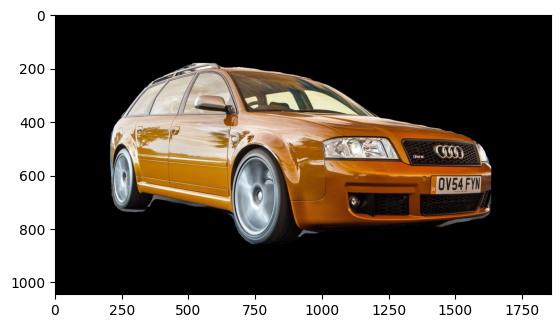

In [11]:
plt.imshow(new)
plt.show()